# Abalone Age Prediction
Description- Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/abalone-dataset/abalone.csv


In [2]:
# Importing the dataset
import pandas as pd
dataset = pd.read_csv("../input/abalone-dataset/abalone.csv")

# Data Analysis

In [3]:
# Displaying the first 5 row in our dataset dataframe
dataset.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


From problem statement and feature discription, let's first compute the target varible of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings

In [4]:
# droping Rings column and adding age column of the abalone
dataset['age'] = dataset['Rings']+1.5
dataset.drop('Rings', axis = 1, inplace = True)

In [5]:
# Display the shape of the dataset
print(dataset.shape)

# Display the Datatype of each attribute
dataset.dtypes

(4177, 9)


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

In [6]:
# Checking whether we have null or empty data in our dataset
print(dataset.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64


We dont have null or empty cells in our dataset so no need to apply imputer library to handle Empty Cell or empty values

In [7]:
# Descriptive Statitistics describe each attribute.
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Ouput attribute age confidence interval range starts from 9 to 12 so it is not starting from zero so it will positive sknew

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25213d10f0>,
      dtype=object)

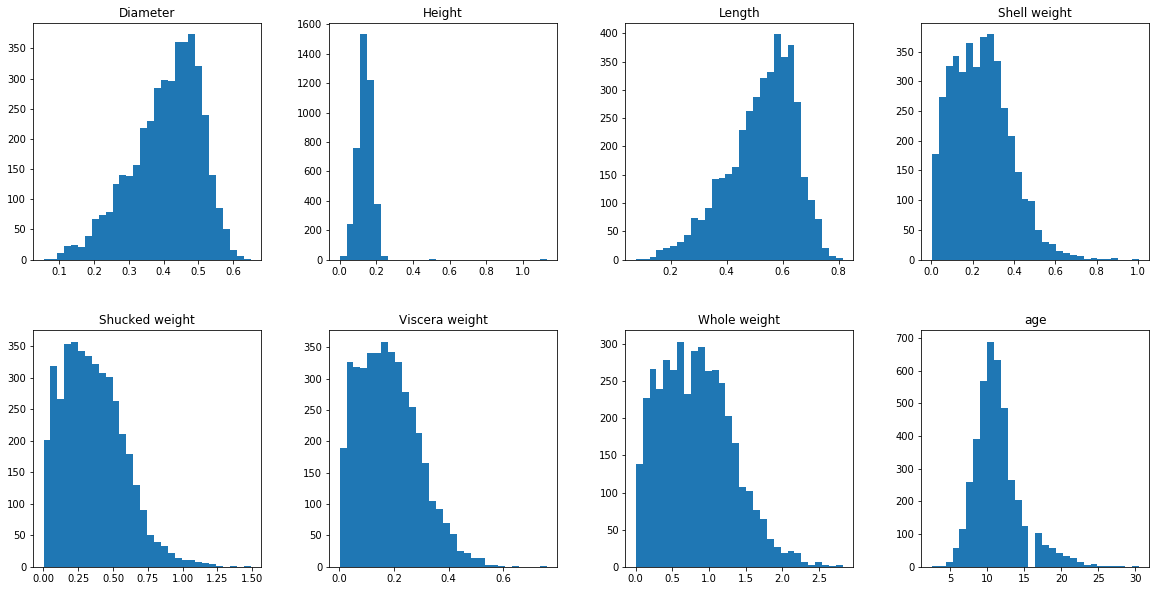

In [8]:
# Histogram visualisation for each attribute to know what kind of distribution it is?
dataset.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2516b67cf8>,
      dtype=object)

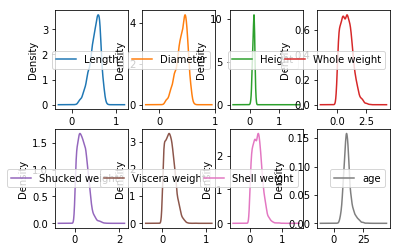

In [9]:
# Density visualisation for all attributes
dataset.plot(kind='density',layout=(2,4),sharex=False,sharey=False,subplots=True,grid=False)


Though features are not normaly distributed, are close to normality

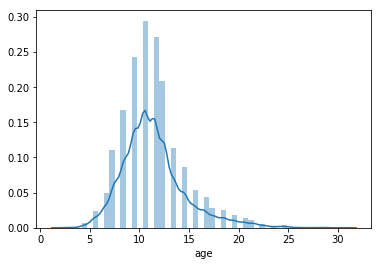

In [10]:
# Histogram Descriptive visualisation distribution for output attribute age

import seaborn as sb
sb.distplot(dataset['age'])

As per above plot we got normal distribution for discrete ouput age column values.

# Analyzing the correlations with output and each input attribute and find outliers.

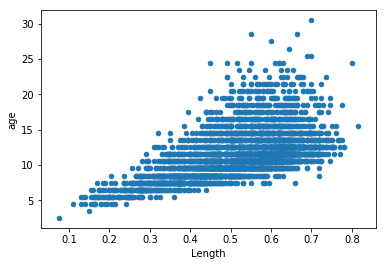

In [11]:
# Histogram visualisation for age output and Longest shell measurement input attributes.

data_plot=pd.concat([dataset['age'],dataset['Length']],axis=1)
data_plot.plot.scatter(x='Length',y='age')

We Dont have any Outliers for age output and Length input attributes as per above visualisation plot.

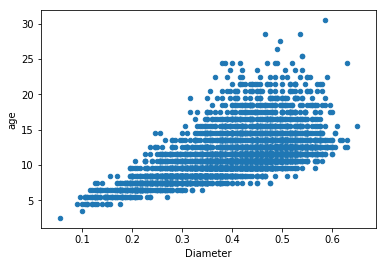

In [12]:
# Histogram visualisation for age output and Diameter input attributes.

data_plot=pd.concat([dataset['Diameter'],dataset['age']],axis=1)
data_plot.plot.scatter(x='Diameter',y='age')

We Dont have any Outliers for age output and Diameter input attributes as per above visualisation plot.

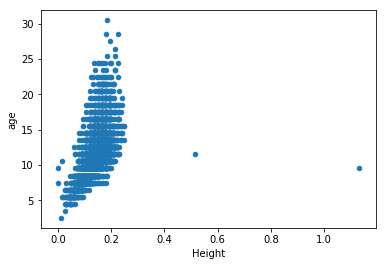

In [13]:
# Histogram visualisation for age output and Height input attributes.

data_plot=pd.concat([dataset['Height'],dataset['age']],axis=1)
data_plot.plot.scatter(x='Height',y='age')

Here we got 2 outlier point in between 0.4 to 1.2 values. Perhaps with this outlier value will effect the performance for our algorithm.

So now we are going to remove this 2 outlier values.

# Removing Outlier for age output and Height input attributes

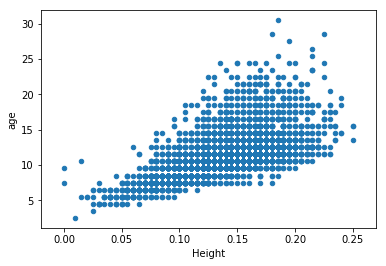

In [14]:
# Removing the outliers values from our dataset
dataset=dataset.drop(dataset[(dataset['Height']>0.4) & (dataset['Height']<1.4)].index)

# Visualising again to know those outlier removed or not
data_plot=pd.concat([dataset['Height'],dataset['age']],axis=1)
data_plot.plot.scatter(x='Height',y='age')

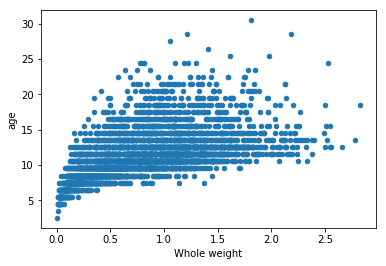

In [15]:
# Histogram visualisation for age output and Whole weight input attributes.

data=pd.concat([dataset['Whole weight'],dataset['age']],axis=1)
data.plot.scatter(x='Whole weight',y='age')

We didnt got any outliers for Rings output and Whole weight input attribute. So we going further to check.

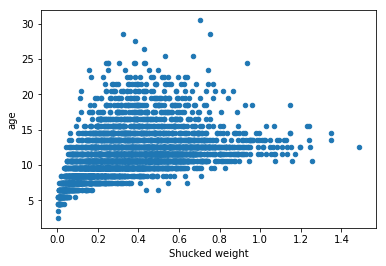

In [16]:
# Histogram visualisation for age output and Shucked weight input attributes.

data=pd.concat([dataset['Shucked weight'],dataset['age']],axis=1)
data.plot.scatter(x='Shucked weight',y='age')

 As we can see above plot with high value we got less rings, so it was near to outlier so we are removing from 1.2 to 1.6 range values for Rings output and Shucked weight input attribute.


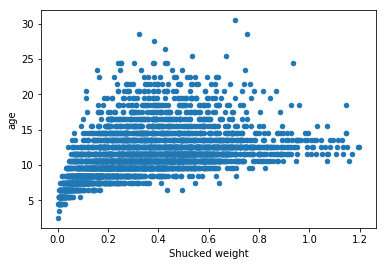

In [17]:
# Removing the outlier values for age output and Shucked weight input attribute.

dataset=dataset.drop(dataset[(dataset['Shucked weight']>1.2)&(dataset['Shucked weight']<15)].index)

# Visualising again to know whether those outlier values removed or not
data=pd.concat([dataset['Shucked weight'],dataset['age']],axis=1)
data.plot.scatter(x='Shucked weight',y='age')

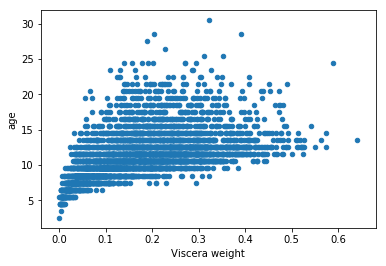

In [18]:
# Histogram visualisation for Viscera weight input attribute and age output attribute.
data=pd.concat([dataset['Viscera weight'],dataset['age']],axis=1)
data.plot.scatter(x='Viscera weight',y='age')

We got again 1 outlier value for Viscera weight input attribute and age output attribut. So now we are going to remove in between 0.6 to 15 value box.

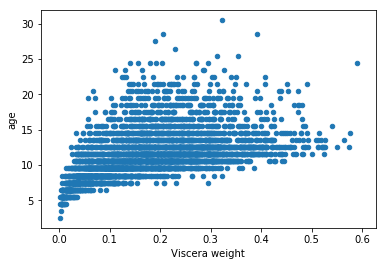

In [19]:
# Removing the outlier value lies in between 0.6 to 15
dataset=dataset.drop(dataset[(dataset['Viscera weight']>0.6)&(dataset['Viscera weight']<15)].index)

# Visualising again to check whether those outliers removed or not
data=pd.concat([dataset['Viscera weight'],dataset['age']],axis=1)
data.plot.scatter(x='Viscera weight',y='age')

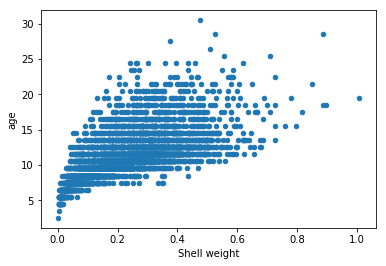

In [20]:
# Histogram Visualisation for Shell weight input attribute and age output attribute.

data=pd.concat([dataset['Shell weight'],dataset['age']],axis=1)
data.plot.scatter(x='Shell weight',y='age')

We are not sure whether those values lies below the threshold 0.9 to 15 values we are going remove those values.

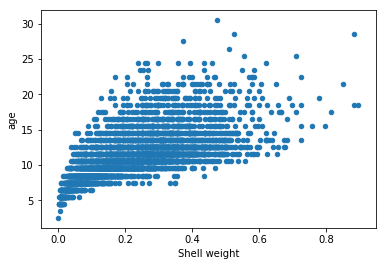

In [21]:
# Removing the outliers for Shell weight input attribute and age output attribute.

dataset=dataset.drop(dataset[(dataset['Shell weight']>0.9)&(dataset['Shell weight']<15)].index)

# Visualising again to check all outlier below the threshold removed or not.

data=pd.concat([dataset['Shell weight'],dataset['age']],axis=1)
data.plot.scatter(x='Shell weight',y='age')

# Correlation values between each attributes using heatmap.

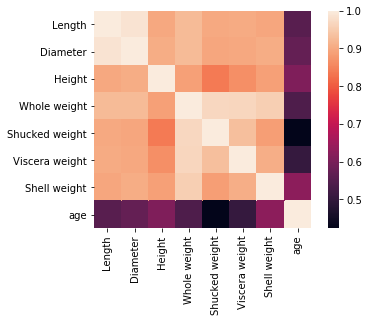

In [22]:
# Correlation value with each attribute using heatmap

import seaborn as sb
correlation_values=dataset.corr()
sb.heatmap(correlation_values,square=True)

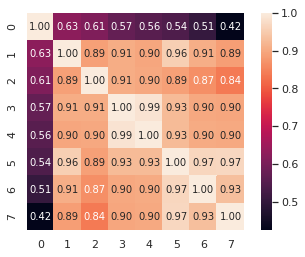

In [23]:
# Zoom in correlation coefficient values in each attribute.

import numpy as np
import matplotlib.pyplot as plt
k=9 #No of Heapmaps values with the best correlation with other variables

# all column  values
cols=dataset.corr().nlargest(k,'age')['age'].index
# find correlation coefficient values
correlation_coefficient=np.corrcoef(dataset[cols].values.T)
# column head name values shape
sb.set(font_scale=1.0)
#heat map
sb.heatmap(correlation_coefficient,cbar=True,annot=True,square=True,
           fmt='.2f',annot_kws={'size': 10},xticklabels=True,yticklabels=True)
plt.show()

# Feature Engineering

# Data Cleaning


No need to apply cleaning to our dataset. Because we dont have any error or empty or null values

In [24]:
# Splitting the dataset into input and output attribute.
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


# Label Encoder

In [25]:
# Encoding the categorical value into numerical values 

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x[:,0]=labelencoder.fit_transform(x[:,0])

# Splitting dataset into training and test set

In [26]:
train_set=0.80
test_set=0.20
seed=5

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_set,test_size=test_set,random_state=seed)


# Modelling

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LinearRegression : -4.857541 (0.499037)
knn : -5.224915 (0.714804)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVR : -5.412334 (0.514978)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


decision_tree : -9.298107 (1.221901)


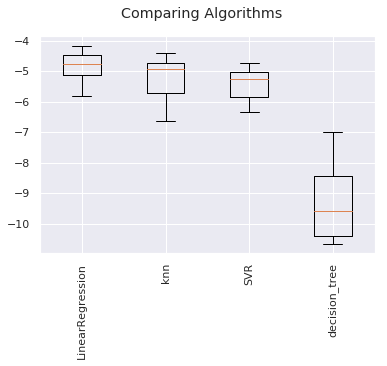

In [27]:
# Spot Checking and Comparing Algorithms Without MinmaxScaler Scaler
n_neighbors=5
models=[]
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
models.append(('LinearRegression',LinearRegression()))
models.append(('knn',KNeighborsRegressor(n_neighbors=n_neighbors)))
models.append(('SVR',SVR()))
models.append(("decision_tree",DecisionTreeRegressor()))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
error='neg_mean_squared_error'
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
axis=fig.add_subplot(111)
plt.boxplot(predictions)
axis.set_xticklabels(names)
plt.xticks(rotation='90')
plt.show()

We listing top two accuracy models

1. LinearRegression : mean -4.857541 (0.499037)
2. knn : mean:-5.224915 std:(0.714804)
Now we are applying regularisation tuning to LinearRegression and knn Regression algorithms

Before going to tuning those 2 algorithms we need to apply feature scaling to our dataset and predicting again then we will take top 2 algorithm which is scaled one.Because scaled algorithm always gives best predictions.

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LinearRegression : -4.857541 (0.499037)
knn : -5.224915 (0.714804)
SVR : -5.412334 (0.514978)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


decision_tree : -9.063559 (0.961076)


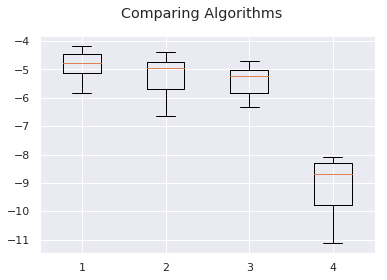

In [28]:
# Spot Checking and Comparing Algorithms With MinmaxScaler Scaler
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import MinMaxScaler
pipelines=[]
pipelines.append(('scaled LinearRegression',Pipeline([('scaler',MinMaxScaler()),('LinearRegression',LinearRegression())])))
pipelines.append(('scaled KNN',Pipeline([('scaler',MinMaxScaler()),('KNN',KNeighborsRegressor(n_neighbors=n_neighbors))])))
pipelines.append(('scaled SVR',Pipeline([('scaler',MinMaxScaler()),('SVR',SVR())])))
pipelines.append(('scaled DecisionTree',Pipeline([('scaler',MinMaxScaler()),('decision',DecisionTreeRegressor())])))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

We listing top two accuracy models, After applying feature scaling performance get increased 

 Before Applying Feature Scaling 
1. LinearRegression : mean -4.857541 (0.499037)
2. knn : mean:-5.224915 std:(0.714804)

 After Applying Feature Scaling
1. LinearRegression : mean -4.857541 (0.499037)
2. knn : mean:-5.224915 std:(0.714804)

Now we are applying regularisation tuning to decision tree and supoort vector algorithms

In [29]:
# Linear Regression Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
param_grid=dict()
model=LinearRegression()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: -4.857541 using {} 


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [30]:
# KNN Regression Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescalex=scaler.transform(x_train)
n_neighbors=[3,4,5,6,7,8,9,10,15,20]
# With degree our model fit to training set overfitting so better not use for all algorithms except polyomial
#degree=[1,2,3,4,5,6,7,8,9]
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescalex,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -5.125680 using {'n_neighbors': 15} 


We listing tunned two accuracy models

Linear Regression Algorithm Best: -4.857541 using {}

KNN Regression Algorithm Best: -5.125680 using {'n_neighbors': 15}

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


scaledAB : -8.172813 (0.750809)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


scaledGBC : -4.812687 (0.621900)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


scaledRFC : -5.273028 (0.695105)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


scaledETC : -5.444307 (0.544326)


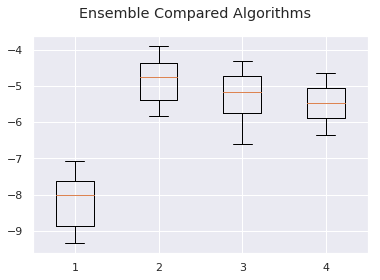

In [31]:
# Ensemble and Boosting algorithm to improve performance

#Ensemble
# Boosting methods
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Bagging methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
ensembles=[]
ensembles.append(('scaledAB',Pipeline([('scale',MinMaxScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('scaledGBC',Pipeline([('scale',MinMaxScaler()),('GBc',GradientBoostingRegressor())])))
ensembles.append(('scaledRFC',Pipeline([('scale',MinMaxScaler()),('rf',RandomForestRegressor(n_estimators=10))])))
ensembles.append(('scaledETC',Pipeline([('scale',MinMaxScaler()),('ETC',ExtraTreesRegressor(n_estimators=10))])))

# Evaluate each Ensemble Techinique
results=[]
names=[]
for name,model in ensembles:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the compared Ensemble Algorithms
fig=plt.figure()
fig.suptitle('Ensemble Compared Algorithms')
plt.boxplot(results)
plt.show()

We listing tunned two accuracy models

Gradient Boosting Algorithm with mean -4.824129 and std(0.622529)

Random Forest Regressor Algorithm with mean -5.198858 and std(0.586180)

Now we are going to tuning this 2 algorithms

In [32]:
# RandomForest Regressor Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_estimators=[5,10,15,20,25,30,40,50,75,100]
param_grid=dict(n_estimators=n_estimators)
model=RandomForestRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -4.832394 using {'n_estimators': 100} 


In [33]:
# Gradient Boosting Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
n_estimators=[10,15,20,25,30,40,50,75,100,150,200]
param_grid=dict(learning_rate=learning_rate,n_estimators=n_estimators)
model=GradientBoostingRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -4.803328 using {'learning_rate': 0.2, 'n_estimators': 50} 


We listing top four tunned algorithms.

1. Linear Regression Algorithm Best: -4.857541 using {}
2. Regression Algorithm Best: -5.125680 using {'n_neighbors': 15}
3. Random Forest Regressor Algorithm Best: -4.797185 using {'n_estimators': 75} 
4. Gradient Boosting Regressor Algorithm -4.802066 using {'learning_rate': 0.2, 'n_estimators': 75} 

As per above four tunned algorithm Decision Tree Classifier Algorithm.

In [34]:
# Finalize Model
# we finalized the Random Forest Regressor algorithm and evaluate the model for Abalone Physical meansurements

from sklearn.metrics import mean_squared_error
scaler=MinMaxScaler().fit(x_train)
scaler_x=scaler.transform(x_train)
model=RandomForestRegressor(n_estimators=75)
model.fit(scaler_x,y_train)

#Transform the validation test set data
scaledx_test=scaler.transform(x_test)
y_pred=model.predict(scaledx_test)

accuracy=mean_squared_error(y_test,y_pred)

print("accuracy :",accuracy)

accuracy : 4.683331679338401


We got Regression accuracy 

training set accuracy: 4.797185

testing accuracy :4.622583966920101